<a href="https://colab.research.google.com/github/msuriya2001/Csharp/blob/main/Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import numpy as np
import matplotlib.pyplot as plt



In [2]:
# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generate an initial point
	best = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	best_eval = objective(best)
	# current working solution
	curr, curr_eval = best, best_eval

	best_track = []

	# run the algorithm
	for i in range(n_iterations):
		# take a step
		candidate = curr + np.random.randn(len(bounds)) * step_size
		# evaluate candidate point
		candidate_eval = objective(candidate)
		# check for new best solution
		if candidate_eval < best_eval:
			# store new best point
			best, best_eval = candidate, candidate_eval
			best_track.append(best)
			# report progress
			print(f'{i}>: f({best}) = {best_eval:.5f}')
		# difference between candidate and current point evaluation
		diff = candidate_eval - curr_eval
		# calculate temperature for current epoch
		t = temp / float(i + 1)
		# calculate metropolis acceptance criterion
		metropolis = np.exp(-diff / t)
		# check if we should keep the new point
		if diff < 0 or np.random.rand() < metropolis:
			# store the new current point
			curr, curr_eval = candidate, candidate_eval
	return best, best_eval, best_track

In [3]:


def plot_optimization(fitness,minx,maxx,best_pos_track):
    x = np.linspace(minx,maxx,300)
    X1,X2 = np.meshgrid(x,x)
    X = np.dstack([X1,X2])
    Y = np.apply_along_axis(fitness,-1,X)
    plt.figure(figsize=(10,10))
    plt.contourf(X1,X2,Y,levels=25,cmap="Blues")
    x,y = np.array(best_pos_track).T
    plt.plot(x,y,"r")
    plt.plot(*best_pos_track[0],"o",label="start")
    plt.plot(*best_pos_track[-1],"X",label="end")
    plt.legend()
    plt.show()



In [4]:
# define range for input
bounds = np.asarray([[-5.0, 5.0],[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10

In [5]:
# Sphere function
def sphere(x):
	x = np.array(x)
	return np.sum(x**2)

In [6]:


np.random.seed(0)
best, score, best_track = simulated_annealing(sphere, bounds, n_iterations, step_size, temp)
print(f'Best solution: {best}')
print(f'Fitness score of the best solution: {score:.5f}')



18>: f([0.00853861 2.17166501]) = 4.71620
19>: f([-0.05543365  2.12372303]) = 4.51327
20>: f([-0.0242973   2.04612099]) = 4.18720
21>: f([-0.05503378  2.00946859]) = 4.04099
22>: f([0.05693741 1.96367635]) = 3.85927
23>: f([0.09947675 1.96087923]) = 3.85494
26>: f([0.11639748 1.95332781]) = 3.82904
27>: f([0.03508285 1.78069955]) = 3.17212
28>: f([0.05282547 1.74052145]) = 3.03221
30>: f([-0.09412851  1.70090115]) = 2.90192
32>: f([-0.05389435  1.63242014]) = 2.66770
33>: f([-0.14097406  1.57453517]) = 2.49903
35>: f([-0.07960424  1.48967309]) = 2.22546
37>: f([0.03827372 1.47168061]) = 2.16731
39>: f([0.1320296 1.4462198]) = 2.10898
44>: f([0.0250081  1.42530694]) = 2.03213
45>: f([0.08546533 1.25100111]) = 1.57231
48>: f([-0.01094101  1.05192323]) = 1.10666
50>: f([0.03567462 0.95346854]) = 0.91037
52>: f([0.0549607  0.91138206]) = 0.83364
53>: f([0.22898605 0.87497338]) = 0.81801
54>: f([0.36338149 0.79315128]) = 0.76114
55>: f([0.37165249 0.66404544]) = 0.57908
56>: f([0.30554206 0

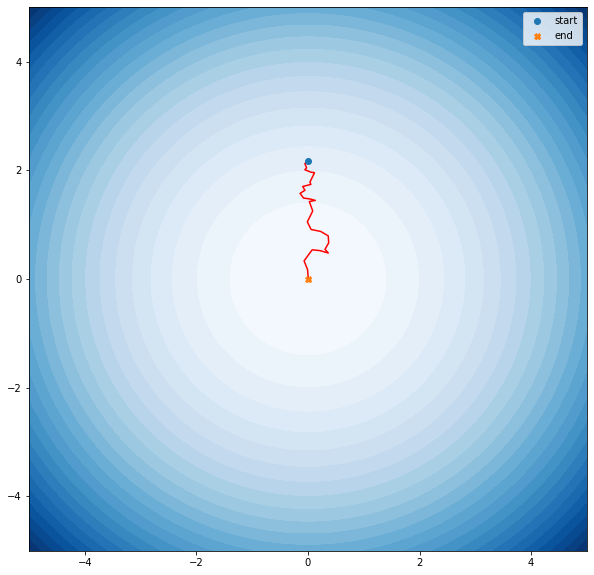

In [7]:
plot_optimization(sphere,-5,5,best_track)

In [8]:
def rastrigin(x):
    x = np.array(x)
    return 10*x.shape[0] + np.sum(x**2 - 10 * np.cos(2*np.pi*x))

In [9]:
# initial temperature
temp = 10000 # high temperature required
np.random.seed(0)
best, score, best_track = simulated_annealing(rastrigin, bounds, n_iterations, step_size, temp)
print(f'Best solution: {best}')
print(f'Fitness score of the best solution: {score:.5f}')

6>: f([0.77571691 2.78448174]) = 24.59661
8>: f([0.81036757 2.76712889]) = 23.53683
19>: f([1.06539877 2.32709291]) = 22.03955
22>: f([0.90728333 2.27929792]) = 19.49823
23>: f([0.87654684 2.24264553]) = 18.19641
24>: f([0.98851804 2.19685329]) = 12.55175
26>: f([0.96762517 2.15778205]) = 10.32309
27>: f([0.90037913 2.12182673]) = 9.99805
35>: f([0.99972135 2.11805864]) = 8.11299
112>: f([0.17708429 1.0250877 ]) = 6.78331
113>: f([-0.01654369  1.04396556]) = 1.52325
115>: f([0.02845306 1.00345602]) = 1.16947
142>: f([0.02055693 1.01339504]) = 1.14609
520>: f([-0.04763031  0.04192169]) = 0.79341
526>: f([-0.02754867  0.05011531]) = 0.64438
582>: f([0.03592515 0.01987013]) = 0.33320
598>: f([ 0.01545163 -0.00010066]) = 0.04733
Best solution: [ 0.01545163 -0.00010066]
Fitness score of the best solution: 0.04733


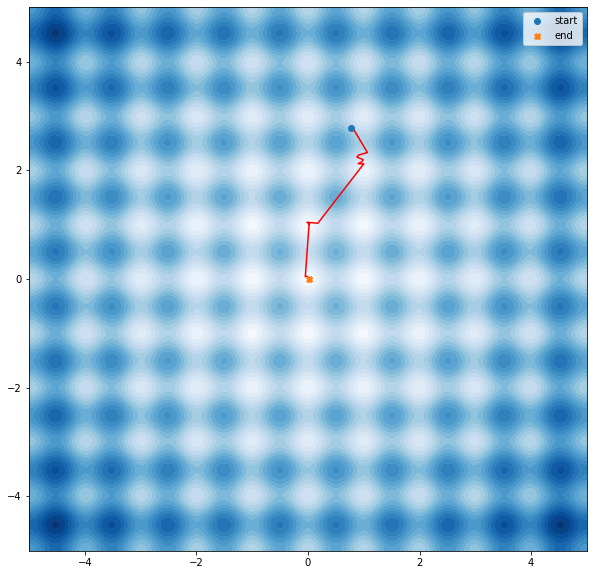

In [10]:
plot_optimization(rastrigin,-5,5,best_track)